Here I am visualizing the results of training and testing on Alibaba dataset

nodepiece_2

In [1]:
import pandas as pd
import time
import platform
import sys
import zipfile
from tqdm import tqdm
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np

seed = 1234

In [2]:

# specify the path to the zip file and the destination directory for the unzipped files
zip_file_path = "All data/Testing Traces/topology_testing_traces.zip"
extract_dir = "All data/Testing Traces/topology_testing_traces"

# create a ZipFile object and extract all files to the destination directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


In [3]:
topology_df = pd.read_csv("All data/Testing Traces/topology_testing_traces/topology_testing_traces/mean_trace_test_max.csv")
topology_df

,metric,common_neighbours,sorensen_index,salton_index,jaccard_index,resource_allocation,adamic_adar,katz_index,lhn_index
0,mrr,0.023059,0.023059,0.023059,0.023059,0.023059,0.023059,0.023059,0.023059
1,hits_at_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,hits_at_3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,hits_at_5,0.029211,0.029211,0.029211,0.029211,0.029211,0.029211,0.029211,0.029211
4,hits_at_10,0.047712,0.047712,0.047712,0.047712,0.047712,0.047712,0.047712,0.047712


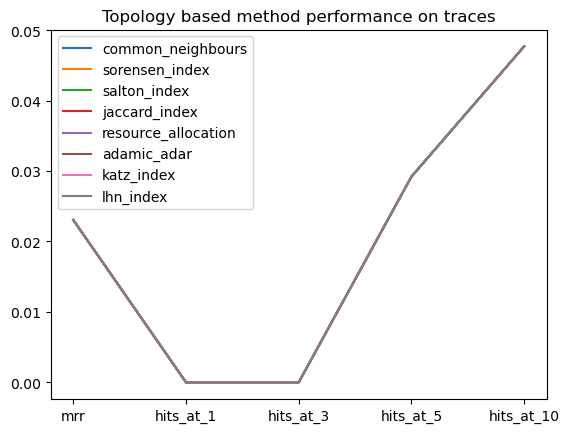

In [4]:
topology_df.plot()
x_values = topology_df['metric']
plt.xticks(np.arange(0,5), x_values)
plt.title("Topology based method performance on traces")
plt.show()

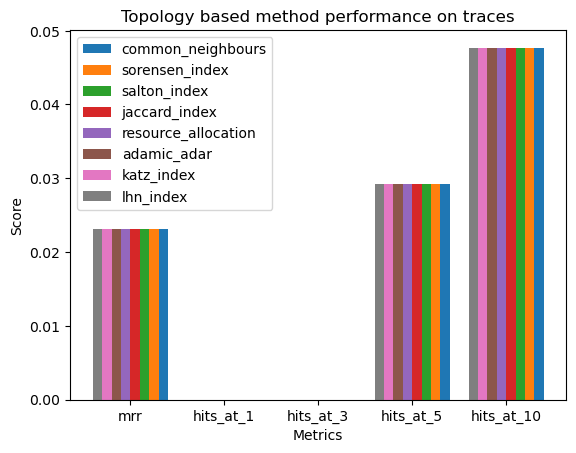

In [5]:
X_axis = np.arange(len(topology_df))+0.35
metrics = list(topology_df)[1:]
for i in range(len(metrics)):
    plt.bar(X_axis - 0.1*i,topology_df[metrics[i]], 0.1, label = metrics[i])
  
x_values = topology_df['metric']
plt.xticks(np.arange(0,len(x_values)), x_values)
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Topology based method performance on traces")
plt.legend()
plt.show()

In [6]:

# specify the path to the zip file and the destination directory for the unzipped files
zip_file_path = "All data/Testing Traces/topology_connected_testing_traces.zip"
extract_dir = "All data/Testing Traces/topology_connected_testing_traces"

# create a ZipFile object and extract all files to the destination directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


In [7]:
topology_connected_df = pd.read_csv("All data/Testing Traces/topology_connected_testing_traces/topology_connected_testing_traces/mean_trace_test_max.csv")
topology_connected_df

,metric,common_neighbours,sorensen_index,salton_index,jaccard_index,resource_allocation,adamic_adar,katz_index,lhn_index
0,mrr,0.037942,0.038857,0.038862,0.039355,0.143154,0.143153,0.137328,0.041754
1,hits_at_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,hits_at_3,0.034091,0.034091,0.034091,0.034091,0.128166,0.128166,0.115694,0.034091
3,hits_at_5,0.054545,0.054545,0.054545,0.056818,0.248808,0.248808,0.175986,0.056818
4,hits_at_10,0.067045,0.069318,0.069318,0.073864,0.325675,0.325675,0.273479,0.075000


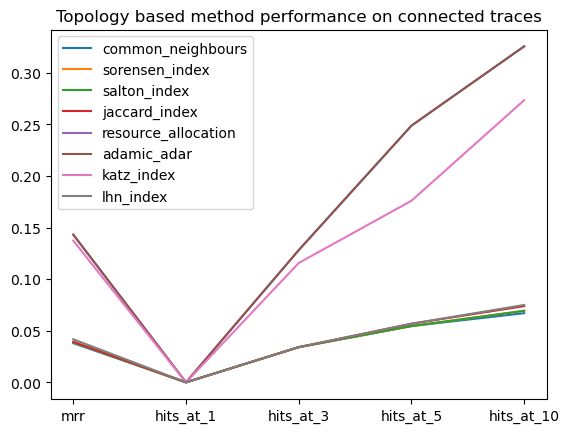

In [8]:
topology_connected_df.plot()
x_values = topology_connected_df['metric']
plt.xticks(np.arange(0,5), x_values)
plt.title("Topology based method performance on connected traces")
plt.show()

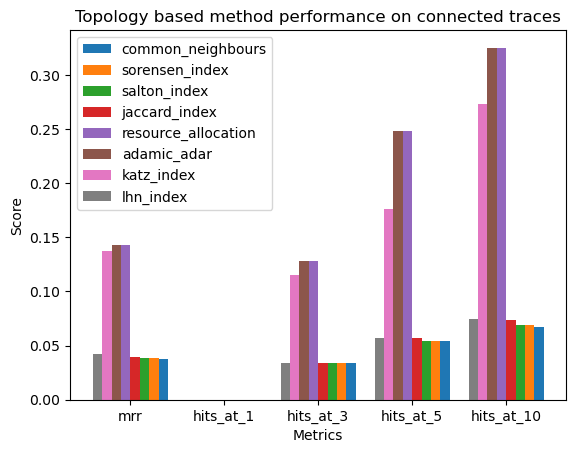

In [9]:
X_axis = np.arange(len(topology_connected_df))+0.35
metrics = list(topology_connected_df)[1:]
for i in range(len(metrics)):
    plt.bar(X_axis - 0.1*i,topology_connected_df[metrics[i]], 0.1, label = metrics[i])
  
x_values = topology_connected_df['metric']
plt.xticks(np.arange(0,len(x_values)), x_values)
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Topology based method performance on connected traces")
plt.legend()
plt.show()

In [10]:
model_name_list = ['convE_transductive','tuckER_transductive','rotatE_transductive','rgcn_transductive','quatE_transductive',
                   'nodepiece_transductive_2']

In [11]:
for model_name in model_name_list:
    
    # specify the path to the zip file and the destination directory for the unzipped files
    zip_file_path = f'All data/Testing Traces/{model_name}_testing_traces.zip'
    extract_dir =f'All data/Testing Traces/{model_name}_testing_traces'

    # create a ZipFile object and extract all files to the destination directory
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)


In [12]:
traces_testing_df_list = []
for model_name in model_name_list:
    traces_testing_df_list.append(pd.read_csv(f'All data/Testing Traces/{model_name}_testing_traces/{model_name}_testing_traces/mean_trace_test_metrics.csv')
                                  .drop(columns=['optimistic','realistic'],axis = 1).rename(columns={'Unnamed: 0':'metric','pessimistic':model_name}))

In [13]:
traces_testing_df_list[0]

,metric,convE_transductive
0,inverse_harmonic_mean_rank,0.568130
1,hits_at_1,0.379935
2,hits_at_3,0.682953
3,hits_at_5,0.796821
4,hits_at_10,0.948251


In [14]:
traces_testing_df = traces_testing_df_list[0]
for i in range(1, len(traces_testing_df_list)):
    traces_testing_df = pd.merge(traces_testing_df,traces_testing_df_list[i],on='metric')

In [15]:
traces_testing_df

,metric,convE_transductive,tuckER_transductive,rotatE_transductive,rgcn_transductive,quatE_transductive,nodepiece_transductive_2
0,inverse_harmonic_mean_rank,0.568130,0.618457,0.758552,0.467251,0.765415,0.431016
1,hits_at_1,0.379935,0.419083,0.588092,0.257203,0.646847,0.230819
2,hits_at_3,0.682953,0.774699,0.924481,0.623348,0.873487,0.545928
3,hits_at_5,0.796821,0.894633,0.965060,0.739477,0.939147,0.696257
4,hits_at_10,0.948251,0.980055,0.989355,0.874131,0.970239,0.817485


C:\Users\gianl\AppData\Local\Temp\ipykernel_7160\773015255.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_values[0] = 'mrr'


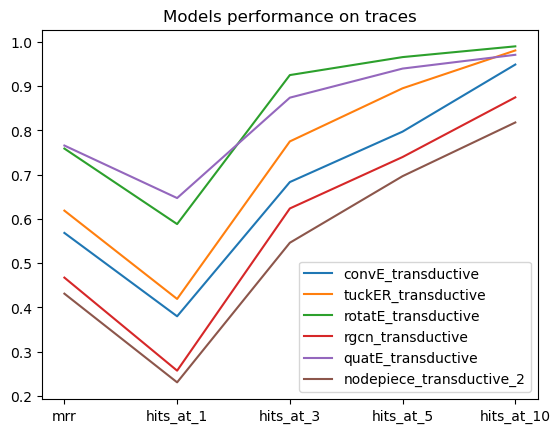

In [16]:
traces_testing_df.plot()
x_values = traces_testing_df['metric']
x_values[0] = 'mrr'
plt.xticks(np.arange(0,5), x_values)
plt.title("Models performance on traces")
plt.show()

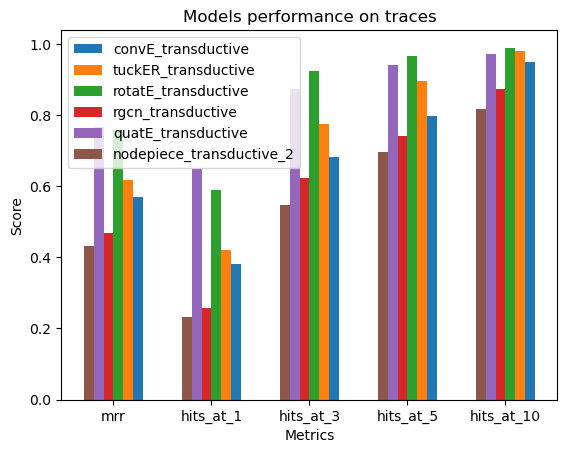

In [17]:
models = list(traces_testing_df)[1:]
X_axis = np.arange(len(traces_testing_df)) +0.25
for i in range(len(models)):
    plt.bar(X_axis - 0.1*i,traces_testing_df[models[i]], 0.1, label = models[i])
  
x_values = traces_testing_df['metric']
plt.xticks(np.arange(0,len(x_values)), x_values)
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Models performance on traces")
plt.legend()
plt.show()

In [18]:
# specify the path to the zip file and the destination directory for the unzipped files
zip_file_path = f'AnyBURL-23-1-sources/src/anyburl_testing_traces.zip'
extract_dir =f'AnyBURL-23-1-sources/src/anyburl_testing_traces'

# create a ZipFile object and extract all files to the destination directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

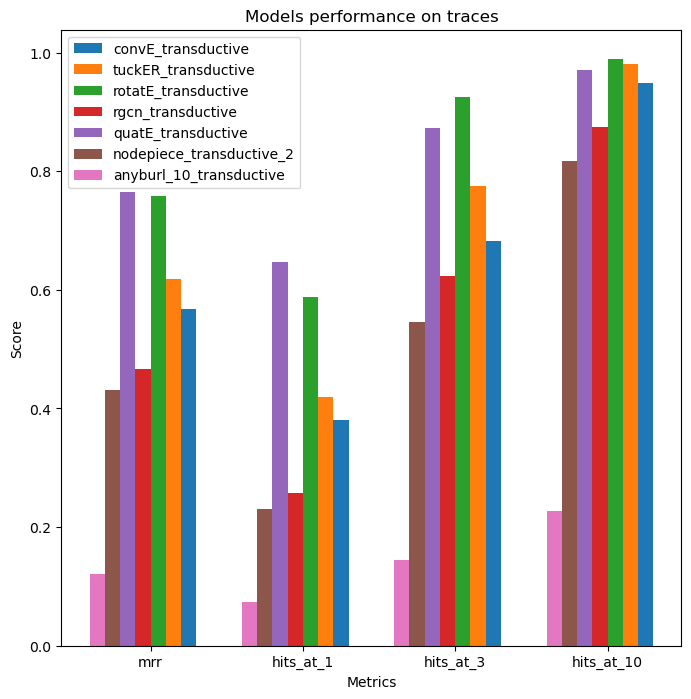

In [19]:
traces_testing_df = traces_testing_df.drop(index=3,axis=0) #dropping hits at 5
anyburl = pd.read_csv(f'AnyBURL-23-1-sources/src/anyburl_testing_traces/anyburl_testing_traces/trace_test.csv').drop(columns='Unnamed: 0',axis=1)
anyburl_list = list(anyburl.mean())
mrr = anyburl_list.pop()
anyburl_list.insert(0,mrr)
traces_testing_df['anyburl_10_transductive'] = anyburl_list
models = list(traces_testing_df)[1:]
X_axis = np.arange(len(traces_testing_df)) +0.25
plt.figure(figsize=(8, 8))
for i in range(len(models)):
    plt.bar(X_axis - 0.1*i,traces_testing_df[models[i]], 0.1, label = models[i])
  
x_values = traces_testing_df['metric']
plt.xticks(np.arange(0,len(x_values)), x_values)
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Models performance on traces")
plt.legend()
plt.show()

In [20]:
# specify the path to the zip file and the destination directory for the unzipped files
zip_file_path = f'AnyBURL-23-1-sources/src/anyburl_pretrained_testing_traces.zip'
extract_dir =f'AnyBURL-23-1-sources/src/anyburl_pretrained_testing_traces'

# create a ZipFile object and extract all files to the destination directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

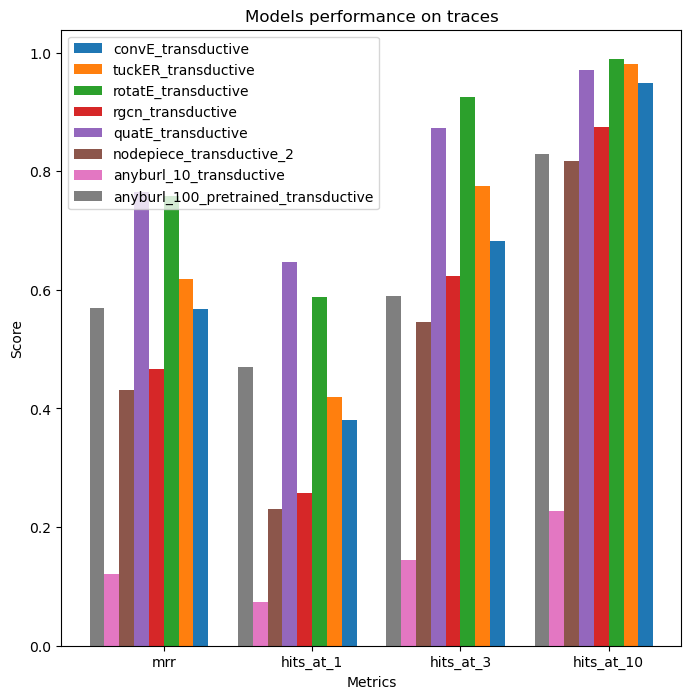

In [21]:
anyburl = pd.read_csv(f'AnyBURL-23-1-sources/src/anyburl_pretrained_testing_traces/anyburl_pretrained_testing_traces/trace_test.csv').drop(columns='Unnamed: 0',axis=1)
anyburl_list = list(anyburl.mean())
mrr = anyburl_list.pop()
anyburl_list.insert(0,mrr)
traces_testing_df['anyburl_100_pretrained_transductive'] = anyburl_list
models = list(traces_testing_df)[1:]
X_axis = np.arange(len(traces_testing_df)) +0.25
plt.figure(figsize=(8, 8))
for i in range(len(models)):
    plt.bar(X_axis - 0.1*i,traces_testing_df[models[i]], 0.1, label = models[i])
  
x_values = traces_testing_df['metric']
plt.xticks(np.arange(0,len(x_values)), x_values)
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Models performance on traces")
plt.legend()
plt.show()

In [22]:
model_name_list = ['convE_transductive','tuckER_transductive','rotatE_transductive','rgcn_transductive','quatE_transductive',
                   'nodepiece_transductive_2','nodepiece_inductive_2']
for model_name in model_name_list:
    
    # specify the path to the zip file and the destination directory for the unzipped files
    zip_file_path = f'All data/{model_name}.zip'
    extract_dir =f'All data/{model_name}'

    # create a ZipFile object and extract all files to the destination directory
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

In [23]:
def plot_test(pred_type,policy):
    policies = ['optimistic', 'realistic','pessimistic']
    policies.remove(policy)
    testing_df_list = []
    for model_name in model_name_list:
        testing_df_list.append(pd.read_csv(f'All data/{model_name}/{model_name}/{model_name}_test_metrics_{pred_type}.csv')
                                     .drop(columns=policies,axis = 1).rename(columns={'Unnamed: 0':'metric',policy:model_name}))
        testing_df = testing_df_list[0]
    for i in range(1, len(testing_df_list)):
        testing_df = pd.merge(testing_df,testing_df_list[i],on='metric')
#     testing_df.plot()
#     x_values = testing_df['metric']
#     x_values[0] = 'mrr'
#     plt.xticks(np.arange(0,5), x_values)
#     plt.title(f'Models performance on {pred_type} prediction on {policy} policy')
#     plt.show()
    
    
    models = list(testing_df)[1:]
    X_axis = np.arange(len(testing_df)) +0.25
    for i in range(len(models)):
        plt.bar(X_axis - 0.1*i,testing_df[models[i]], 0.1, label = models[i])

    x_values = testing_df['metric']
    x_values[0] = 'mrr'

    plt.xticks(np.arange(0,len(x_values)), x_values)
    plt.xlabel("Metrics")
    plt.ylabel("Score")
    plt.title(f'Models performance on {pred_type} prediction on {policy} policy')
    plt.legend()

    plt.show()

C:\Users\gianl\AppData\Local\Temp\ipykernel_7160\2644506279.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_values[0] = 'mrr'


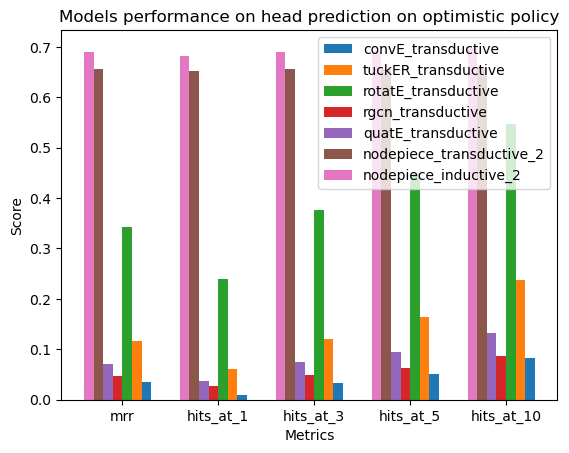

C:\Users\gianl\AppData\Local\Temp\ipykernel_7160\2644506279.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_values[0] = 'mrr'


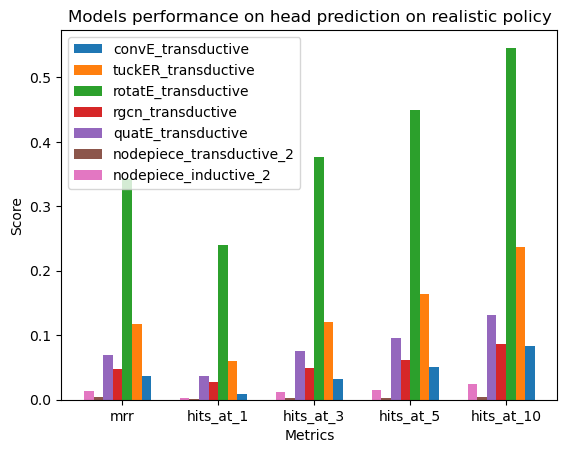

C:\Users\gianl\AppData\Local\Temp\ipykernel_7160\2644506279.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_values[0] = 'mrr'


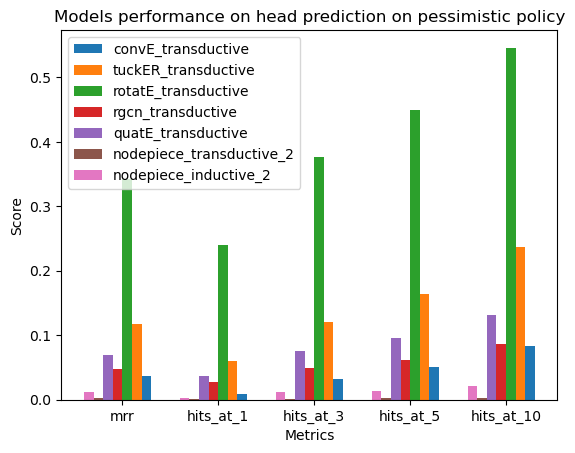

C:\Users\gianl\AppData\Local\Temp\ipykernel_7160\2644506279.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_values[0] = 'mrr'


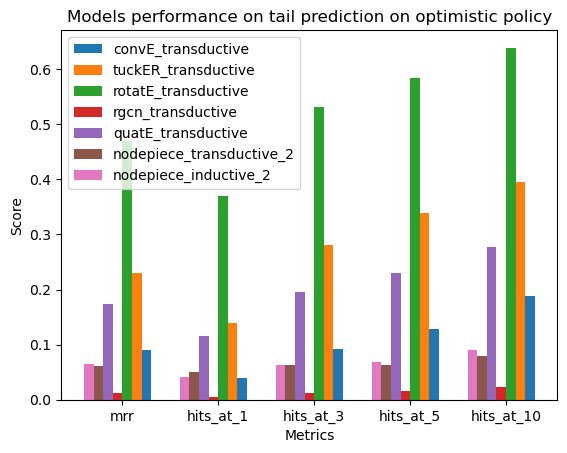

C:\Users\gianl\AppData\Local\Temp\ipykernel_7160\2644506279.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_values[0] = 'mrr'


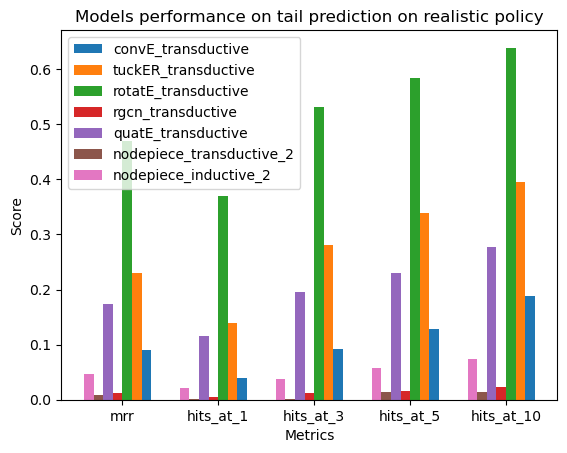

C:\Users\gianl\AppData\Local\Temp\ipykernel_7160\2644506279.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_values[0] = 'mrr'


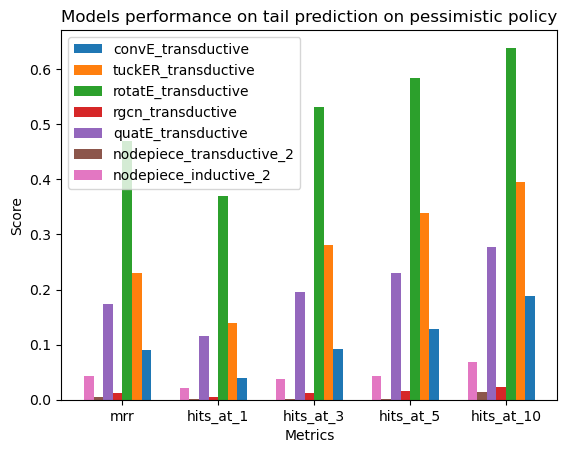

C:\Users\gianl\AppData\Local\Temp\ipykernel_7160\2644506279.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_values[0] = 'mrr'


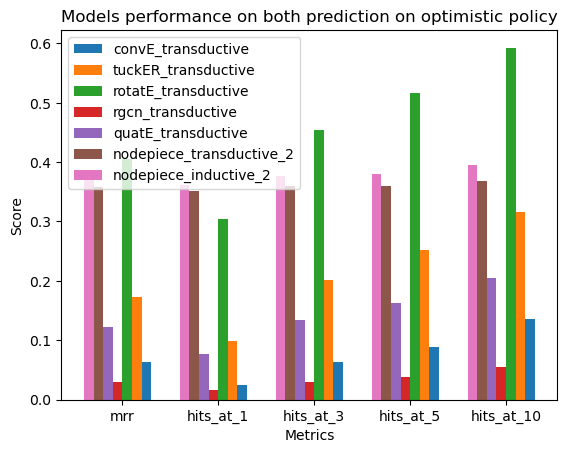

C:\Users\gianl\AppData\Local\Temp\ipykernel_7160\2644506279.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_values[0] = 'mrr'


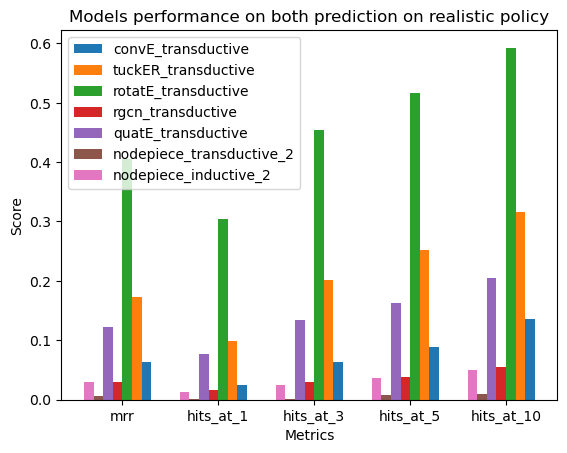

C:\Users\gianl\AppData\Local\Temp\ipykernel_7160\2644506279.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_values[0] = 'mrr'


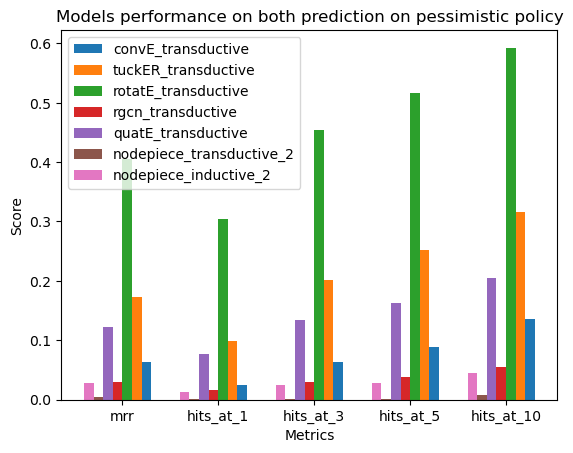

In [24]:
for pred_type in ['head','tail','both']:
    for policy in ['optimistic', 'realistic','pessimistic']:
        plot_test(pred_type,policy)

In [25]:
def plot_information(information):
#     columns = [
# #         'device', 'parameters bytes','number parameters', 'training duration','training evaluation duration',
# #               'validation evaluation duration','testing evaluation duration','Operating system name',
# #               'Operating system version','Processor architecture','Python version','Processor model name',
# #               'Number cpu cores','Total physical memory','GPU','loss','embedding_dim','learning_rate','optimizer',
#                 'num_epochs','patience'
#               ]
#     columns.remove(information)
    information_df_list = []
    for model_name in model_name_list:
        temp_df = pd.read_csv(f'All data/{model_name}/{model_name}/{model_name}_information.csv')
        temp_df = temp_df[temp_df['name']==information].rename(columns={'value':model_name}).drop(columns=['Unnamed: 0'],axis=1)
        information_df_list.append(temp_df)
    
    temp_df = pd.read_csv(f'AnyBURL-23-1-sources/src/anyburl_entire_graph/anyburl_entire_graph/anyburl_information.csv')
    temp_df = temp_df[temp_df['name']==information].rename(columns={'value':'anyburl'}).drop(columns=['Unnamed: 0'],axis=1)
    information_df_list.append(temp_df)
    information_df = information_df_list[0]
    
    for i in range(1, len(information_df_list)):
        information_df = pd.merge(information_df,information_df_list[i],on='name')
    information_df = information_df.drop(columns=['name'],axis=1)
    names = list(information_df)
    information_df = information_df.transpose()
    column = list(information_df)[0]
    information_df = information_df.rename(columns={column:information})
    information_df[information]=information_df[information].astype(float)
#     for elem in names:
#         information_df[elem] = information_df[elem].astype(float)
#     information_df=np.log(information_df)
    display(information_df)
#     information_df.plot()
    plt.bar(names,list(information_df[information]))
#     plt.plot(list(information_df.loc[0]))
#     plt.hist(list(information_df.loc[0]))
    x_values =names
    plt.xticks(np.arange(0,len(x_values)), x_values, rotation=90)
    plt.title(f'Models {information}')
    plt.show()
    

In [26]:
# specify the path to the zip file and the destination directory for the unzipped files
zip_file_path = f'AnyBURL-23-1-sources/src/anyburl_entire_graph.zip'
extract_dir =f'AnyBURL-23-1-sources/src/anyburl_entire_graph'

# create a ZipFile object and extract all files to the destination directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

,parameters bytes
convE_transductive,2.170017e+07
tuckER_transductive,4.533360e+07
rotatE_transductive,2.666080e+07
rgcn_transductive,1.557229e+07
quatE_transductive,5.332160e+07
nodepiece_transductive_2,9.728000e+05
nodepiece_inductive_2,6.732800e+06
anyburl,1.000000e+09


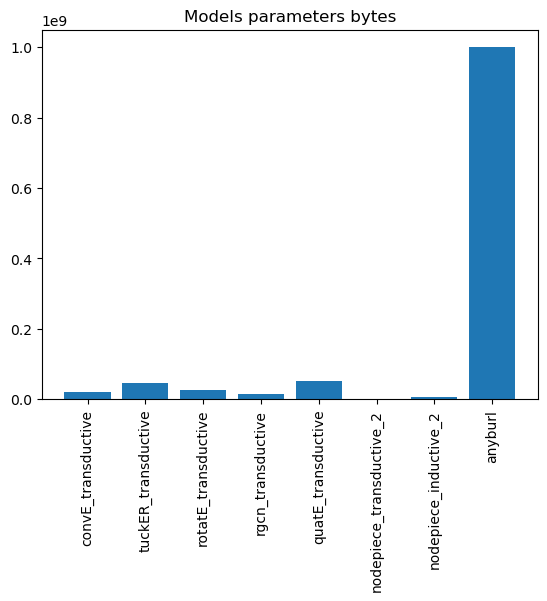

,number parameters
convE_transductive,5425043.0
tuckER_transductive,11333400.0
rotatE_transductive,6665200.0
rgcn_transductive,3893072.0
quatE_transductive,13330400.0
nodepiece_transductive_2,243200.0
nodepiece_inductive_2,1683200.0
anyburl,377728.0


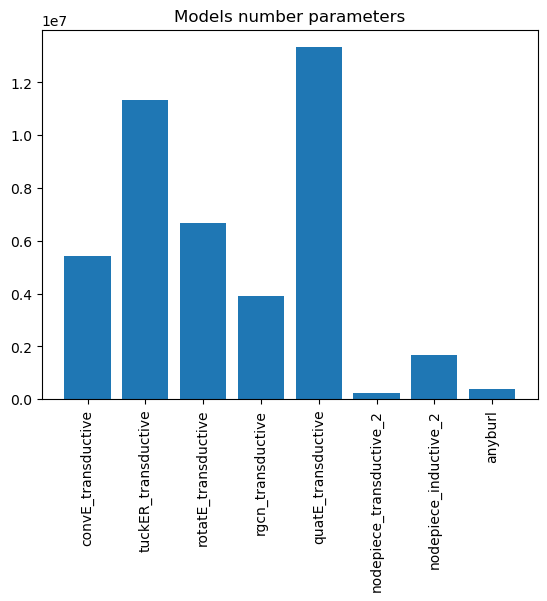

,training duration
convE_transductive,152.307357
tuckER_transductive,2184.641061
rotatE_transductive,1083.521330
rgcn_transductive,162.562170
quatE_transductive,5897.180882
nodepiece_transductive_2,249.551234
nodepiece_inductive_2,72.856738
anyburl,100.000000


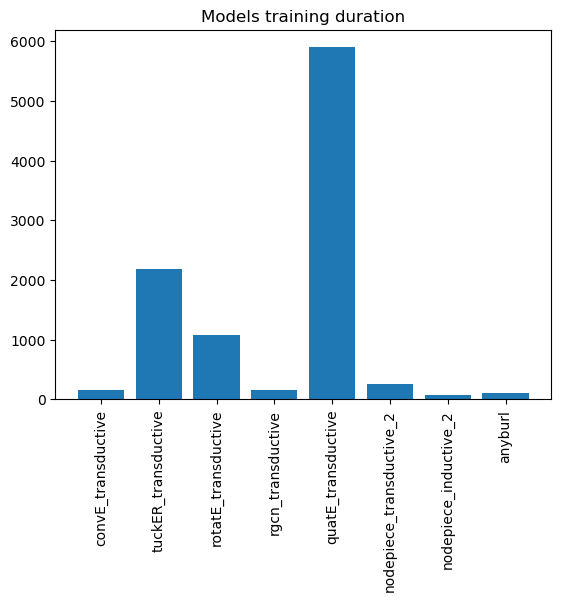

,testing evaluation duration
convE_transductive,3.743608
tuckER_transductive,15.446498
rotatE_transductive,9.931920
rgcn_transductive,6.276913
quatE_transductive,73.281976
nodepiece_transductive_2,6.582701
nodepiece_inductive_2,1.217404
anyburl,53.595100


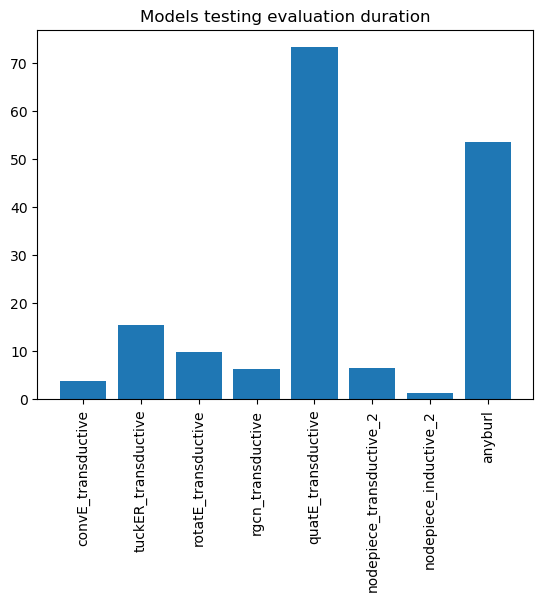

In [27]:
for information in['parameters bytes','number parameters', 'training duration','testing evaluation duration']:
    plot_information(information)

In [28]:
# policy = "pessimistic"
# pred_type = "tail"
# policies = ['optimistic', 'realistic','pessimistic']
# policies.remove(policy)
# testing_df_list = []
# for model_name in model_name_list:
#     testing_df_list.append(pd.read_csv(f'All data/{model_name}/{model_name}/{model_name}_test_metrics_{pred_type}.csv')
#                                      .drop(columns=policies,axis = 1).rename(columns={'Unnamed: 0':'metric',policy:model_name}))
# # testing_df_list.append(pd.read_csv(f'AnyBURL-23-1-sources/src/anyburl_entire_graph/anyburl_entire_graph/anyburl.csv').drop(columns='Unnamed: 0',axis=1))
# testing_df = testing_df_list[0]
# for i in range(1, len(testing_df_list)):
#     testing_df = pd.merge(testing_df,testing_df_list[i],on='metric')

# testing_df = testing_df.drop(index=3,axis=0) #dropping hits at 5
# anyburl = pd.read_csv(f'AnyBURL-23-1-sources/src/anyburl_entire_graph/anyburl_entire_graph/anyburl.csv').drop(columns='Unnamed: 0',axis=1)
# anyburl_list = list(anyburl.iloc[0])
# mrr = anyburl_list.pop()
# anyburl_list.insert(0,mrr)
# # model_name_list.append('anyburl')
# testing_df['anyburl_100_transductive'] = anyburl_list
# display(testing_df)
# models = list(testing_df)[1:]
# X_axis = np.arange(len(testing_df)) +0.25
# plt.figure(figsize=(8, 8))

# for i in range(len(models)):
#     plt.bar(X_axis - 0.1*i,testing_df[models[i]], 0.1, label = models[i])

# x_values = testing_df['metric']
# x_values[0] = 'mrr'
# plt.xticks(np.arange(0,len(x_values)), x_values)
# plt.xlabel("Metrics")
# plt.ylabel("Score")
# plt.title(f'Models performance on {pred_type} prediction on {policy} policy')
# plt.legend()
# plt.show()

In [29]:
def plot_test_2(pred_type,policy):
    policies = ['optimistic', 'realistic','pessimistic']
    policies.remove(policy)
    testing_df_list = []
    for model_name in model_name_list:
        testing_df_list.append(pd.read_csv(f'All data/{model_name}/{model_name}/{model_name}_test_metrics_{pred_type}.csv')
                                         .drop(columns=policies,axis = 1).rename(columns={'Unnamed: 0':'metric',policy:model_name}))
    # testing_df_list.append(pd.read_csv(f'AnyBURL-23-1-sources/src/anyburl_entire_graph/anyburl_entire_graph/anyburl.csv').drop(columns='Unnamed: 0',axis=1))
    testing_df = testing_df_list[0]
    for i in range(1, len(testing_df_list)):
        testing_df = pd.merge(testing_df,testing_df_list[i],on='metric')

    testing_df = testing_df.drop(index=3,axis=0) #dropping hits at 5
    anyburl = pd.read_csv(f'AnyBURL-23-1-sources/src/anyburl_entire_graph/anyburl_entire_graph/anyburl.csv').drop(columns='Unnamed: 0',axis=1)
    anyburl_list = list(anyburl.iloc[0])
    mrr = anyburl_list.pop()
    anyburl_list.insert(0,mrr)
    # model_name_list.append('anyburl')
    testing_df['anyburl_100_transductive'] = anyburl_list
    display(testing_df)
    models = list(testing_df)[1:]
    X_axis = np.arange(len(testing_df)) +0.25
    plt.figure(figsize=(8, 8))

    for i in range(len(models)):
        plt.bar(X_axis - 0.1*i,testing_df[models[i]], 0.1, label = models[i])

    x_values = testing_df['metric']
    x_values[0] = 'mrr'
    plt.xticks(np.arange(0,len(x_values)), x_values)
    plt.xlabel("Metrics")
    plt.ylabel("Score")
    plt.title(f'Models performance on {pred_type} prediction on {policy} policy')
    plt.legend()
    plt.show()

,metric,convE_transductive,tuckER_transductive,rotatE_transductive,rgcn_transductive,quatE_transductive,nodepiece_transductive_2,nodepiece_inductive_2,anyburl_100_transductive
0,inverse_harmonic_mean_rank,0.035839,0.116845,0.341663,0.047420,0.069786,0.655206,0.689833,0.4355
1,hits_at_1,0.009284,0.059900,0.239600,0.027674,0.035976,0.652116,0.681156,0.3523
2,hits_at_3,0.032673,0.120336,0.375558,0.048831,0.074719,0.655151,0.690452,0.4705
4,hits_at_10,0.083467,0.236297,0.545885,0.086145,0.131851,0.657650,0.698241,0.6037


C:\Users\gianl\AppData\Local\Temp\ipykernel_7160\1544872627.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_values[0] = 'mrr'


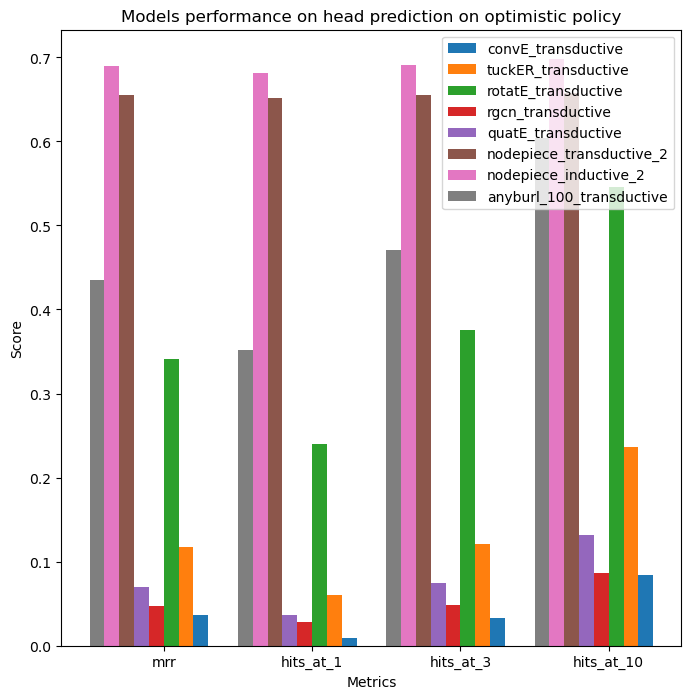

,metric,convE_transductive,tuckER_transductive,rotatE_transductive,rgcn_transductive,quatE_transductive,nodepiece_transductive_2,nodepiece_inductive_2,anyburl_100_transductive
0,inverse_harmonic_mean_rank,0.035839,0.116845,0.341663,0.047420,0.069786,0.003257,0.013618,0.4355
1,hits_at_1,0.009284,0.059900,0.239600,0.027674,0.035976,0.000357,0.003015,0.3523
2,hits_at_3,0.032673,0.120336,0.375558,0.048831,0.074719,0.001875,0.011809,0.4705
4,hits_at_10,0.083467,0.236297,0.545885,0.086145,0.131851,0.004374,0.024372,0.6037


C:\Users\gianl\AppData\Local\Temp\ipykernel_7160\1544872627.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_values[0] = 'mrr'


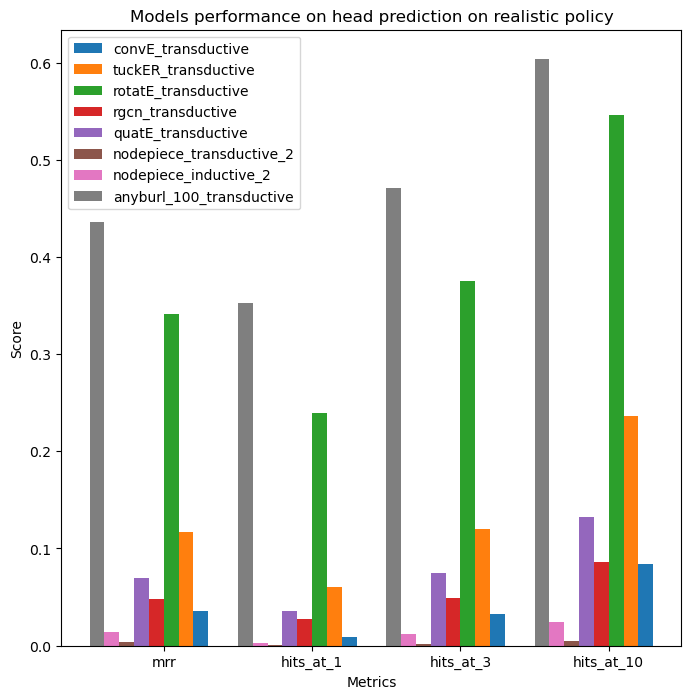

,metric,convE_transductive,tuckER_transductive,rotatE_transductive,rgcn_transductive,quatE_transductive,nodepiece_transductive_2,nodepiece_inductive_2,anyburl_100_transductive
0,inverse_harmonic_mean_rank,0.035839,0.116845,0.341663,0.047420,0.069786,0.002442,0.012160,0.4355
1,hits_at_1,0.009284,0.059900,0.239600,0.027674,0.035976,0.000357,0.003015,0.3523
2,hits_at_3,0.032673,0.120336,0.375558,0.048831,0.074719,0.001339,0.011809,0.4705
4,hits_at_10,0.083467,0.236297,0.545885,0.086145,0.131851,0.002500,0.021608,0.6037


C:\Users\gianl\AppData\Local\Temp\ipykernel_7160\1544872627.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_values[0] = 'mrr'


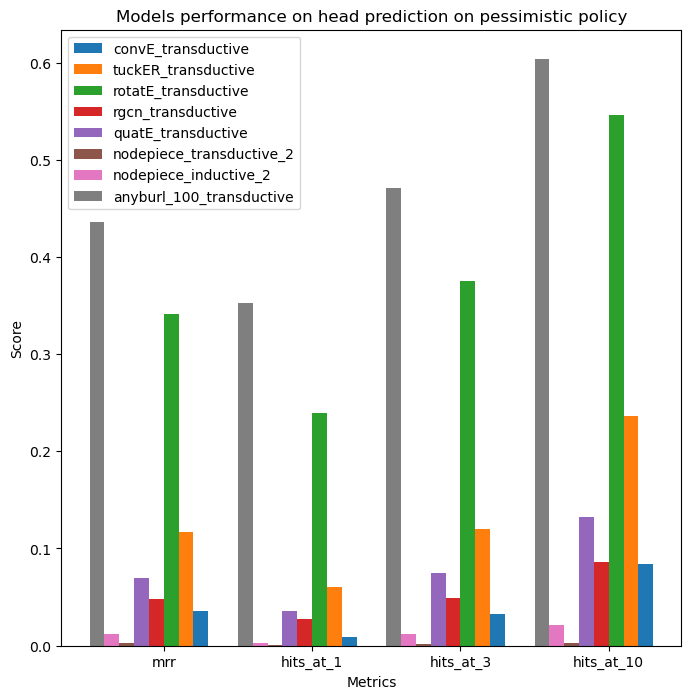

,metric,convE_transductive,tuckER_transductive,rotatE_transductive,rgcn_transductive,quatE_transductive,nodepiece_transductive_2,nodepiece_inductive_2,anyburl_100_transductive
0,inverse_harmonic_mean_rank,0.090014,0.229754,0.469115,0.011751,0.173272,0.061445,0.064085,0.4355
1,hits_at_1,0.038654,0.138904,0.370112,0.004374,0.116319,0.049813,0.040955,0.3523
2,hits_at_3,0.092751,0.281646,0.531066,0.011069,0.194697,0.062757,0.063317,0.4705
4,hits_at_10,0.188091,0.396269,0.639618,0.022764,0.277272,0.079986,0.090201,0.6037


C:\Users\gianl\AppData\Local\Temp\ipykernel_7160\1544872627.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_values[0] = 'mrr'


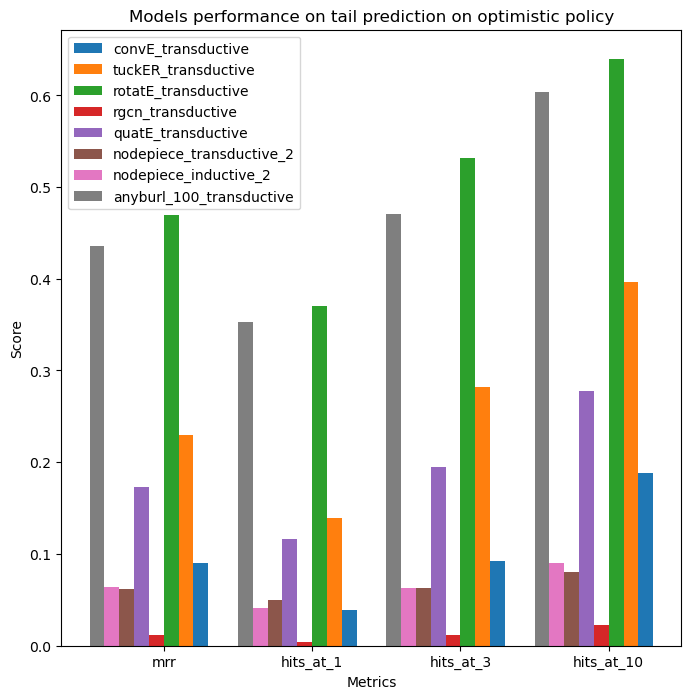

,metric,convE_transductive,tuckER_transductive,rotatE_transductive,rgcn_transductive,quatE_transductive,nodepiece_transductive_2,nodepiece_inductive_2,anyburl_100_transductive
0,inverse_harmonic_mean_rank,0.090014,0.229754,0.469115,0.011751,0.173272,0.007882,0.046283,0.4355
1,hits_at_1,0.038654,0.138904,0.370112,0.004374,0.116319,0.000357,0.021357,0.3523
2,hits_at_3,0.092751,0.281646,0.531066,0.011069,0.194697,0.000982,0.037186,0.4705
4,hits_at_10,0.188091,0.396269,0.639618,0.022764,0.277272,0.014105,0.074372,0.6037


C:\Users\gianl\AppData\Local\Temp\ipykernel_7160\1544872627.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_values[0] = 'mrr'


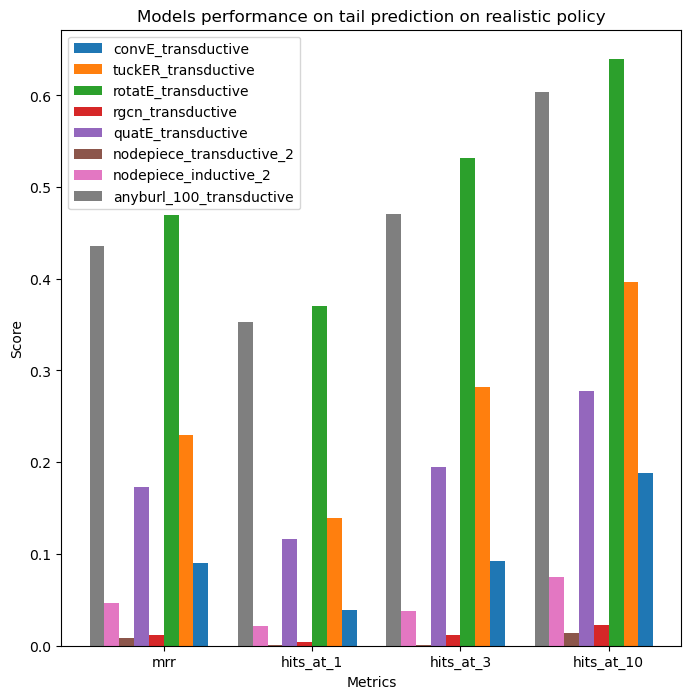

,metric,convE_transductive,tuckER_transductive,rotatE_transductive,rgcn_transductive,quatE_transductive,nodepiece_transductive_2,nodepiece_inductive_2,anyburl_100_transductive
0,inverse_harmonic_mean_rank,0.090014,0.229754,0.469115,0.011751,0.173272,0.005513,0.043638,0.4355
1,hits_at_1,0.038654,0.138904,0.370112,0.004374,0.116319,0.000357,0.021357,0.3523
2,hits_at_3,0.092751,0.281646,0.531066,0.011069,0.194697,0.000625,0.036683,0.4705
4,hits_at_10,0.188091,0.396269,0.639618,0.022764,0.277272,0.013480,0.068593,0.6037


C:\Users\gianl\AppData\Local\Temp\ipykernel_7160\1544872627.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_values[0] = 'mrr'


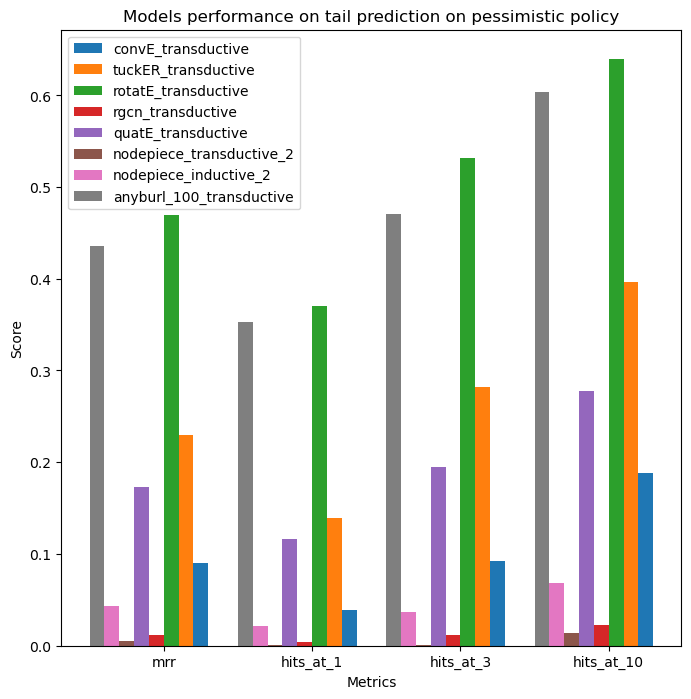

,metric,convE_transductive,tuckER_transductive,rotatE_transductive,rgcn_transductive,quatE_transductive,nodepiece_transductive_2,nodepiece_inductive_2,anyburl_100_transductive
0,inverse_harmonic_mean_rank,0.062926,0.173300,0.405389,0.029585,0.121529,0.358326,0.376959,0.4355
1,hits_at_1,0.023969,0.099402,0.304856,0.016024,0.076147,0.350964,0.361055,0.3523
2,hits_at_3,0.062712,0.200991,0.453312,0.029950,0.134708,0.358954,0.376884,0.4705
4,hits_at_10,0.135779,0.316283,0.592751,0.054455,0.204562,0.368818,0.394221,0.6037


C:\Users\gianl\AppData\Local\Temp\ipykernel_7160\1544872627.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_values[0] = 'mrr'


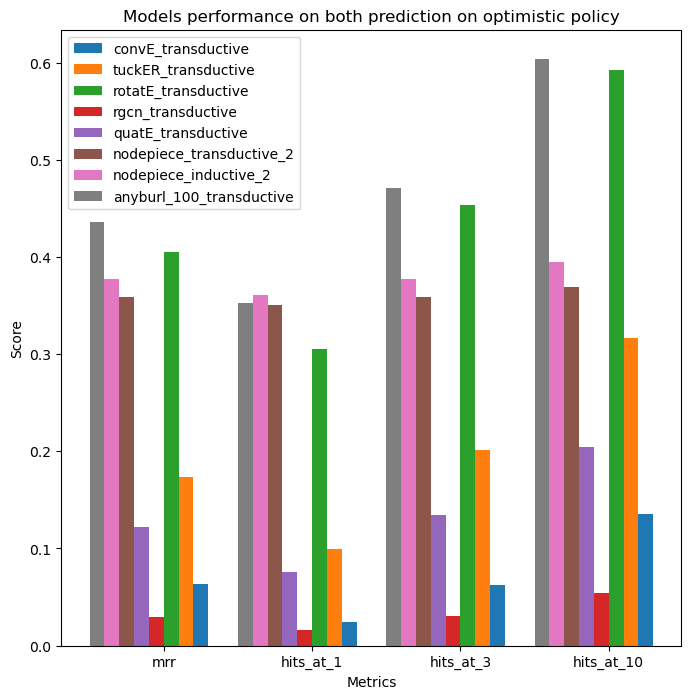

,metric,convE_transductive,tuckER_transductive,rotatE_transductive,rgcn_transductive,quatE_transductive,nodepiece_transductive_2,nodepiece_inductive_2,anyburl_100_transductive
0,inverse_harmonic_mean_rank,0.062926,0.173300,0.405389,0.029585,0.121529,0.005569,0.029950,0.4355
1,hits_at_1,0.023969,0.099402,0.304856,0.016024,0.076147,0.000357,0.012186,0.3523
2,hits_at_3,0.062712,0.200991,0.453312,0.029950,0.134708,0.001428,0.024497,0.4705
4,hits_at_10,0.135779,0.316283,0.592751,0.054455,0.204562,0.009239,0.049372,0.6037


C:\Users\gianl\AppData\Local\Temp\ipykernel_7160\1544872627.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_values[0] = 'mrr'


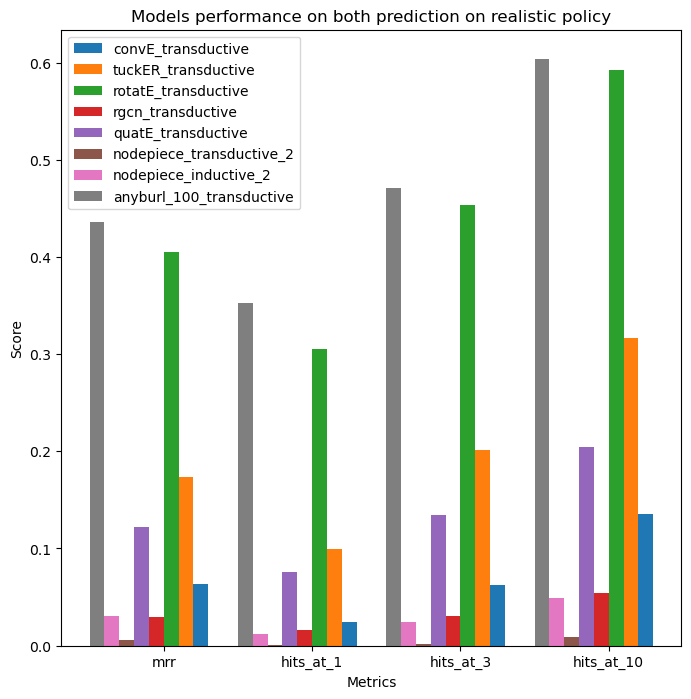

,metric,convE_transductive,tuckER_transductive,rotatE_transductive,rgcn_transductive,quatE_transductive,nodepiece_transductive_2,nodepiece_inductive_2,anyburl_100_transductive
0,inverse_harmonic_mean_rank,0.062926,0.173300,0.405389,0.029585,0.121529,0.003977,0.027899,0.4355
1,hits_at_1,0.023969,0.099402,0.304856,0.016024,0.076147,0.000357,0.012186,0.3523
2,hits_at_3,0.062712,0.200991,0.453312,0.029950,0.134708,0.000982,0.024246,0.4705
4,hits_at_10,0.135779,0.316283,0.592751,0.054455,0.204562,0.007990,0.045101,0.6037


C:\Users\gianl\AppData\Local\Temp\ipykernel_7160\1544872627.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_values[0] = 'mrr'


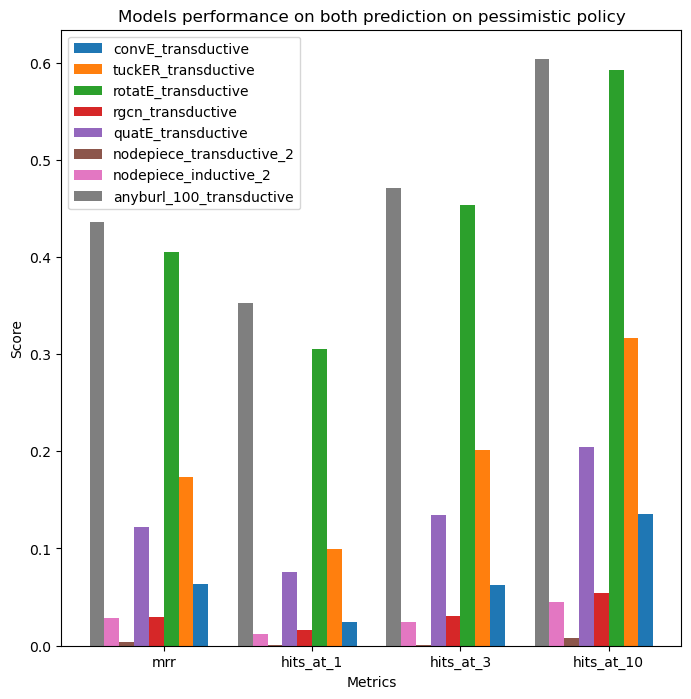

In [30]:
for pred_type in ['head','tail','both']:
    for policy in ['optimistic', 'realistic','pessimistic']:
        plot_test_2(pred_type,policy)